<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/Galton_Family_Heights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/Galton_Family_Heights.csv"

df= pd.read_csv(url)

df

,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1
...,...,...,...,...
929,62.0,66.0,64.0,1
930,62.0,66.0,62.0,0
931,62.0,66.0,61.0,0
932,62.5,63.0,66.5,1


Filas, columnas: (934, 4)


,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1



Estadísticos descriptivos (Child, Father, Mother):


,Child_height,Father_height,Mother_height
count,934.000000,934.000000,934.000000
mean,66.745931,69.197109,64.089293
std,3.579251,2.476479,2.290886
min,56.000000,62.000000,58.000000
25%,64.000000,68.000000,63.000000
50%,66.500000,69.000000,64.000000
75%,69.700000,71.000000,65.875000
max,79.000000,78.500000,70.500000



Matriz de correlación (Pearson):


,Child_height,Father_height,Mother_height
Child_height,1.000000,0.266039,0.201322
Father_height,0.266039,1.000000,0.060366
Mother_height,0.201322,0.060366,1.000000



Promedios de estatura del hijo(a) por género:


,count,mean,std
gender,,,
0,453,64.103974,2.355653
1,481,69.234096,2.623905


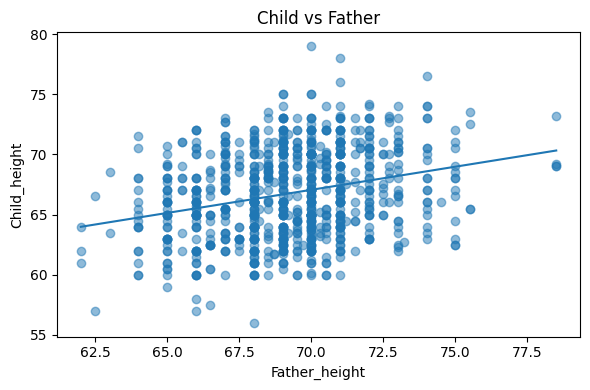

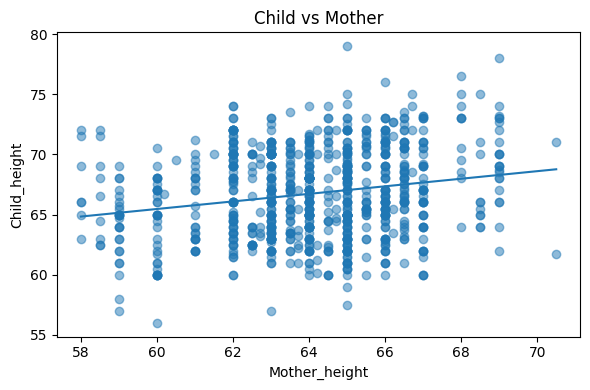

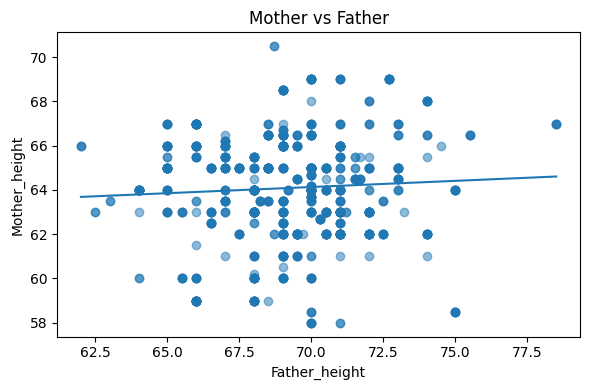


Regresión: Child_height ~ Father_height + Mother_height
                            OLS Regression Results                            
Dep. Variable:           Child_height   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     54.74
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           3.33e-23
Time:                        19:19:08   Log-Likelihood:                -2463.9
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     931   BIC:                             4948.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

,resid_model_g
count,9.340000e+02
mean,-4.081589e-13
std,2.161208e+00
min,-9.524690e+00
25%,-1.465264e+00
50%,9.429879e-02
75%,1.485988e+00
max,9.120083e+00


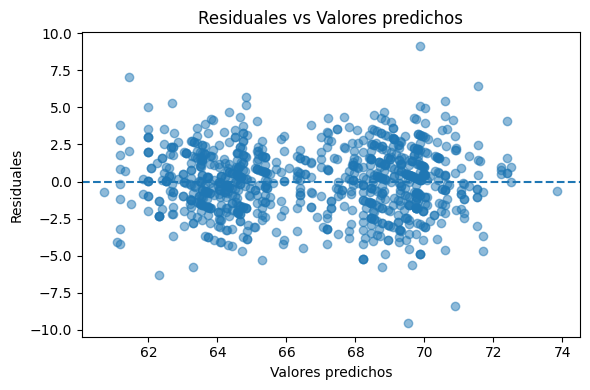

<Figure size 600x400 with 0 Axes>

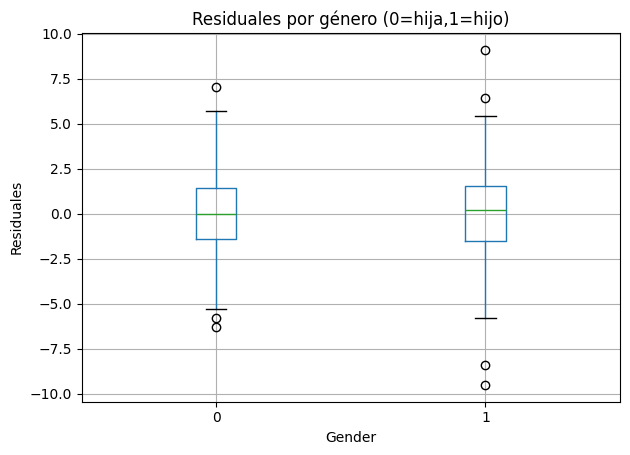


T-test (hijo vs hija): stat=31.476, p-value=0.0000, df~929.9

Archivo con residuales guardado como /content/Galton_with_residuals.csv


In [ ]:
# Análisis completo del dataset Galton_Family_Heights.csv

# --- Carga y librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/Galton_Family_Heights.csv"
df = pd.read_csv(url)
df.columns = [c.strip() for c in df.columns]   # limpiar nombres
print("Filas, columnas:", df.shape)
display(df.head())

# --- 2. Estadísticos descriptivos básicos ---
print("\nEstadísticos descriptivos (Child, Father, Mother):")
display(df[['Child_height','Father_height','Mother_height']].describe())

# --- 3. Correlaciones (Pearson) ---
corrs = df[['Child_height','Father_height','Mother_height']].corr()
print("\nMatriz de correlación (Pearson):")
display(corrs)

# --- 4. Promedios por género ---
# Asumimos gender==1 -> hijo/varón, gender==0 -> hija/mujer (revisa si tu dataset documenta esto)
group_stats = df.groupby('gender')['Child_height'].agg(['count','mean','std'])
print("\nPromedios de estatura del hijo(a) por género:")
display(group_stats)

# --- 5. Gráficas (scatter + línea de ajuste simple) ---
def scatter_with_fit(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.5)
    # línea de ajuste simple
    m, b = np.polyfit(x, y, 1)
    xs = np.array([x.min(), x.max()])
    plt.plot(xs, m*xs + b)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

scatter_with_fit(df['Father_height'], df['Child_height'], 'Father_height', 'Child_height', 'Child vs Father')
scatter_with_fit(df['Mother_height'], df['Child_height'], 'Mother_height', 'Child_height', 'Child vs Mother')
scatter_with_fit(df['Father_height'], df['Mother_height'], 'Father_height', 'Mother_height', 'Mother vs Father')

# --- 6. Regresión lineal múltiple básica: Child ~ Father + Mother ---
X = df[['Father_height','Mother_height']]
X = sm.add_constant(X)
y = df['Child_height']
model = sm.OLS(y, X).fit()
print("\nRegresión: Child_height ~ Father_height + Mother_height")
print(model.summary())

# --- 7. Modelo incluyendo género (dummy): Child ~ Father + Mother + gender ---
Xg = df[['Father_height','Mother_height','gender']]
Xg = sm.add_constant(Xg)
model_g = sm.OLS(y, Xg).fit()
print("\nRegresión: Child_height ~ Father_height + Mother_height + gender")
print(model_g.summary())

# --- 8. Predicciones para padre=69, madre=65 ---
padre = 69
madre = 65
new_no_g = pd.DataFrame({'const':[1],'Father_height':[padre],'Mother_height':[madre]})
pred_no_g = model.predict(new_no_g)[0]

new_hijo = pd.DataFrame({'const':[1],'Father_height':[padre],'Mother_height':[madre],'gender':[1]})
new_hija = pd.DataFrame({'const':[1],'Father_height':[padre],'Mother_height':[madre],'gender':[0]})
pred_hijo = model_g.predict(new_hijo)[0]
pred_hija = model_g.predict(new_hija)[0]

print(f"\nPredicción (sin género): {pred_no_g:.3f} pulgadas")
print(f"Predicción (con género) -> hijo: {pred_hijo:.3f} pulgadas; hija: {pred_hija:.3f} pulgadas")

# --- 9. Residuales y diagnóstico rápido ---
df['resid_model_g'] = model_g.resid
print("\nResumen de residuales (modelo con género):")
display(df['resid_model_g'].describe())

# Residuales vs predicho
plt.figure(figsize=(6,4))
plt.scatter(model_g.fittedvalues, model_g.resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuales")
plt.title("Residuales vs Valores predichos")
plt.tight_layout()
plt.show()

# Residuales por género (boxplot)
plt.figure(figsize=(6,4))
df.boxplot(column='resid_model_g', by='gender')
plt.suptitle('')
plt.title('Residuales por género (0=hija,1=hijo)')
plt.xlabel('Gender')
plt.ylabel('Residuales')
plt.tight_layout()
plt.show()

# --- 10. T-test (diferencia de medias hijos vs hijas) ---
hijo = df[df['gender']==1]['Child_height']
hija = df[df['gender']==0]['Child_height']
tt = ttest_ind(hijo, hija, usevar='unequal')
print(f"\nT-test (hijo vs hija): stat={tt[0]:.3f}, p-value={tt[1]:.4f}, df~{tt[2]:.1f}")

# --- 11. Guardar resultados (opcional) ---
df.to_csv('/content/Galton_with_residuals.csv', index=False)
print("\nArchivo con residuales guardado como /content/Galton_with_residuals.csv")